In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic2"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import load_excel, load_odin_as_ml_dataset, plot_confusion_matrix, make_ml_dataset, run_binary_regression, transport_modes

Changed to c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation


In [2]:
# Here just in case
year = 2022
odin_excel_path = os.path.join(os.getcwd(), "data", "OdiN 2019-2023", f"OdiN {year}", f"ODiN{year}_Databestand.csv")
df = load_excel(odin_excel_path)
df = df[df["Verpl"] == 1]

Loaded file from CSV


In [3]:
print(transport_modes)

{1: 'Car - driver', 2: 'Car - passenger', 3: 'Train', 4: 'Bus/tram/metro', 5: 'Bicycle', 6: 'On foot', 7: 'Other'}


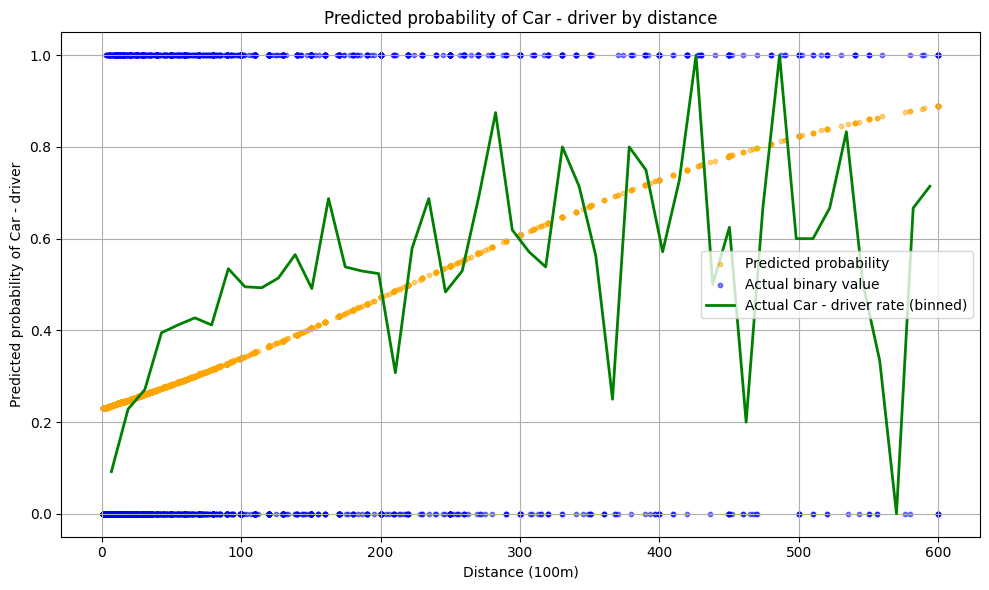

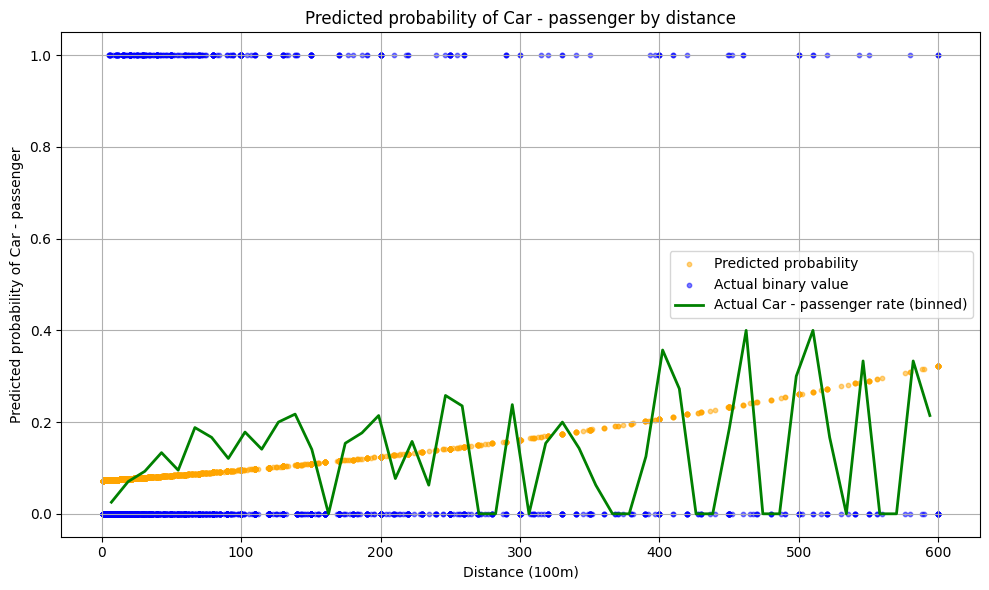

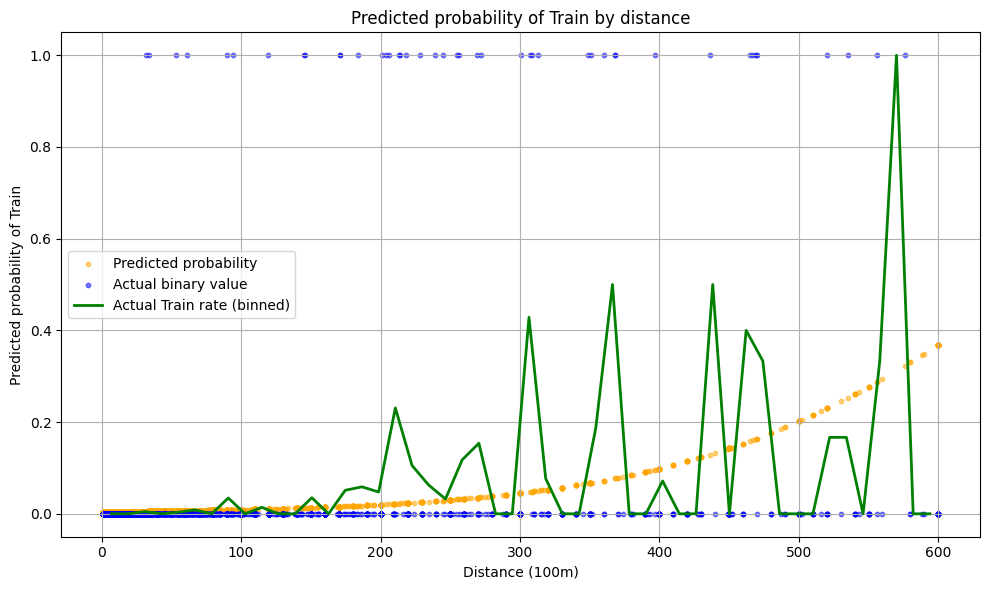

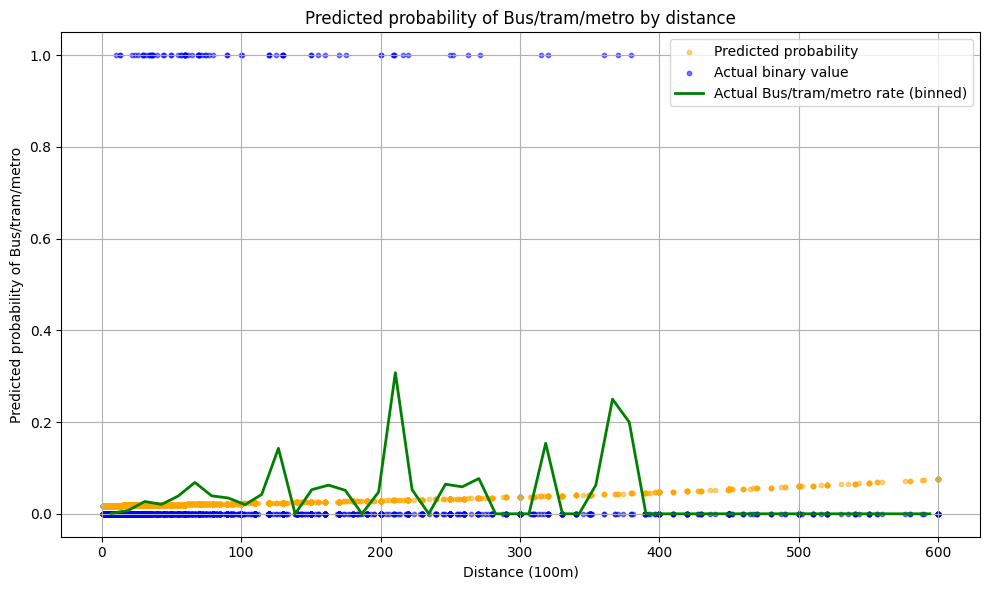

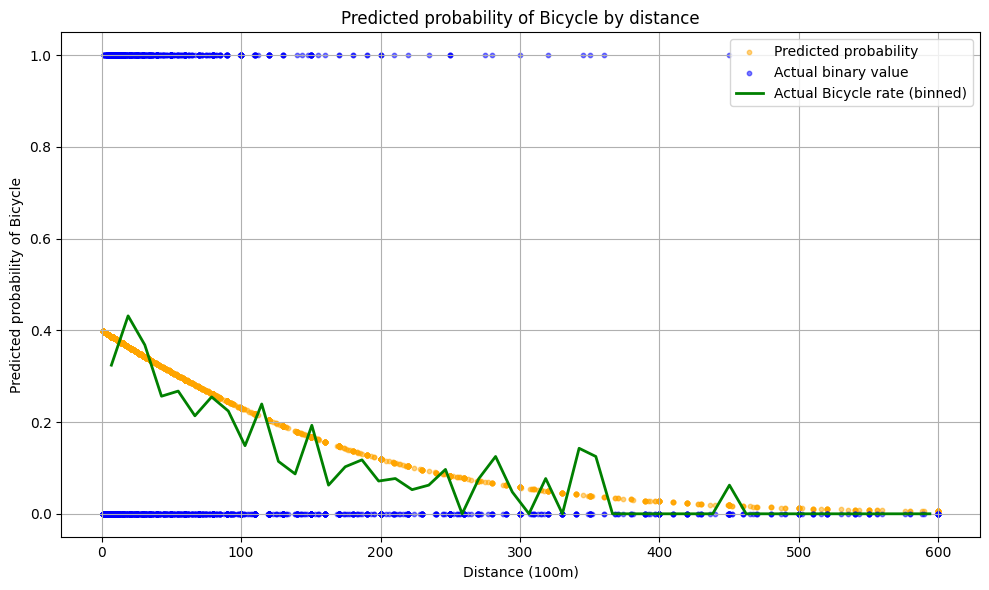

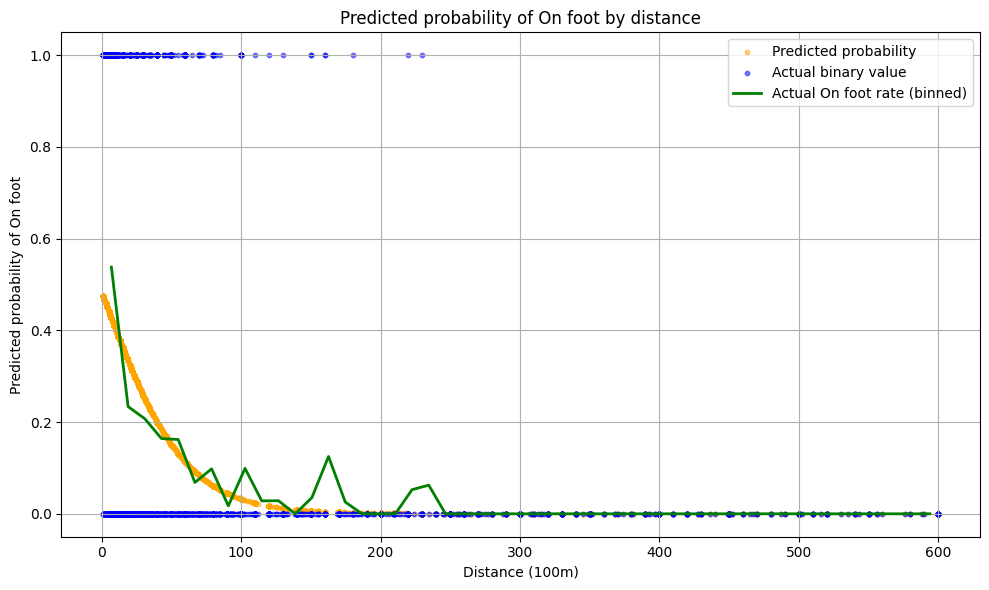

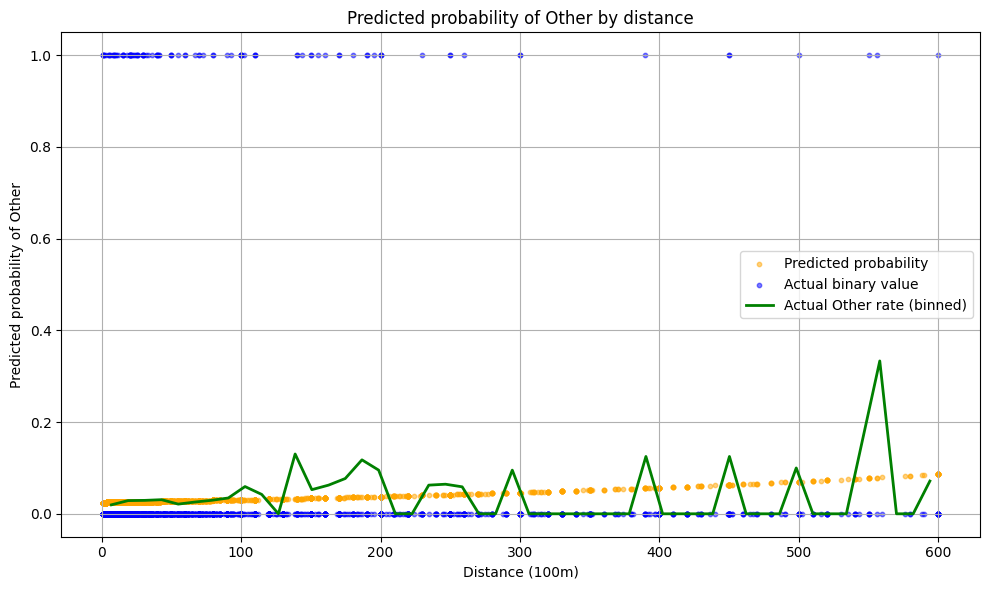

In [5]:
max_dist=600 # max distance in 100s of meters

for transport_mode in transport_modes.keys():
    run_binary_regression(
        df,
        transport_mode=transport_mode,
        max_dist=max_dist,
        savename=f"graphics/classification_results/binary_regression_{transport_modes[transport_mode]}_{max_dist}",
    )

Classifier takes distance and predicts bike or not, use probability output as values

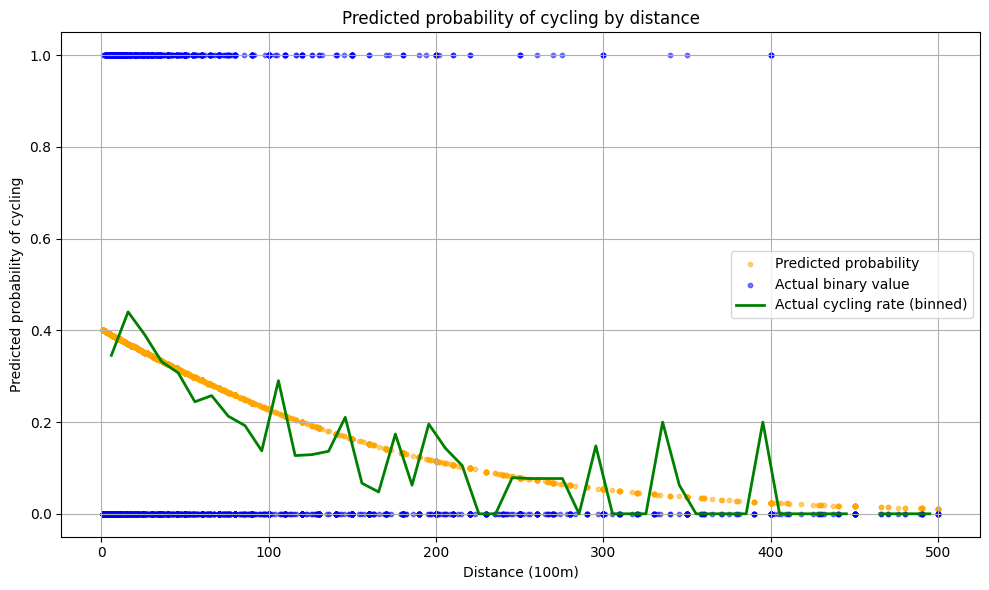

In [ ]:
# Use a binary regression model to predict whether a trip is by bike or not
# Then plot the model's predictions as a line graph
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from scipy.stats import binned_statistic

def run_binary_regression(df: pd.DataFrame, test_size=0.02, max_dist=500, plot=True, savename=None):

    X_train, X_test, y_train, y_test = make_ml_dataset(
        filter_by_distance_and_duration(df, 0, max_dist, 0, np.inf),
        target_col="KHvm",
        target_val=5,  # Bicycle
        drop_cols=[col for col in df.columns if col not in ["KHvm", "AfstV"]],
        categorical_cols=None,
        test_size=test_size
        )

    scaler = MinMaxScaler()
    model = LogisticRegression()
    pipeline = make_pipeline(scaler, model)
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict_proba(X_test)[:, 1]  # Get the probability of cycling

    if plot:
        # Bin settings
        bins = 50

        # Compute average actual cycling per bin
        bin_means, bin_edges, _ = binned_statistic(X_test.values.flatten(), y_test.values.flatten(), statistic='mean', bins=bins)
        bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        # Plot predicted and actual
        plt.figure(figsize=(10, 6))
        plt.scatter(X_test, y_pred, label="Predicted probability", alpha=0.5, color="orange", s=10)
        plt.scatter(X_test, y_test, label="Actual binary value", alpha=0.5, color="blue", s=10)
        plt.plot(bin_centers, bin_means, label="Actual cycling rate (binned)", color="green", linewidth=2)

        # add the histogram of the actual values
        plt.xlabel("Distance (100m)")
        plt.ylabel("Predicted probability of cycling")
        plt.title("Predicted probability of cycling by distance")
        plt.legend()
        plt.grid()
        plt.tight_layout()

        if savename:
            plt.savefig(savename, dpi=300)
        plt.show()

In [ ]:
df["AfstV"]*0.1

1          1.0
2          1.0
3         12.0
4         43.0
6         40.0
          ... 
200049    11.0
200050     1.1
200051     0.6
200052     6.3
200053     6.3
Name: AfstV, Length: 172256, dtype: float64

In [ ]:
# Use a random forest classifier as an example
X_train, X_test, y_train, y_test = load_odin_as_ml_dataset(year=2022,)

model = RandomForestClassifier(random_state=42, verbose=0, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

KeyboardInterrupt: 

In [ ]:

print(classification_report(y_test, y_pred))
print(cm)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     34067
        True       1.00      0.98      0.99      5944

    accuracy                           1.00     40011
   macro avg       1.00      0.99      0.99     40011
weighted avg       1.00      1.00      1.00     40011

[[34039    28]
 [  145  5799]]


In [ ]:
X_train, X_test, y_train, y_test = load_odin_as_ml_dataset(year=2022, target_val=None)

labels = [
    "Te voet",
    "Fiets, elektrische fiets of speedpedelec",
    "Brom- of snorfiets",
    "Personenauto",
    "Bestelauto",
    "Motor",
    "Trein",
    "Bus, tram of metro",
    "Anders",
    "Onbekend",
    "Niet van toepassing; OP werkt altijd thuis",
    "Niet van toepassing; OP heeft geen betaald werk",
    "Niet van toepassing; OP jonger dan 15 jaar"
]

model = RandomForestClassifier(random_state=42, verbose=0, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)


Loaded file from CSV
Drop Column AantRitVertLoc not in dataframe
Categorical Column Wogem not in dataframe
Categorical Column RDHalteA not in dataframe
Categorical Column AutoHhl not in dataframe
Categorical Column KGewitchPa1 not in dataframe
Categorical Column AantOVVPl not in dataframe
              precision    recall  f1-score   support

           1       0.99      0.91      0.95       734
           2       0.97      0.99      0.98      5944
           3       1.00      0.91      0.95       332
           4       0.99      0.99      0.99     10127
           5       0.99      0.89      0.94       615
           6       1.00      0.88      0.93       105
           7       0.98      0.99      0.99      2165
           8       1.00      0.93      0.96      1029
           9       1.00      0.88      0.94       157
          10       1.00      0.99      0.99       517
          11       0.98      0.88      0.93       819
          12       0.99      1.00      0.99     13890
       

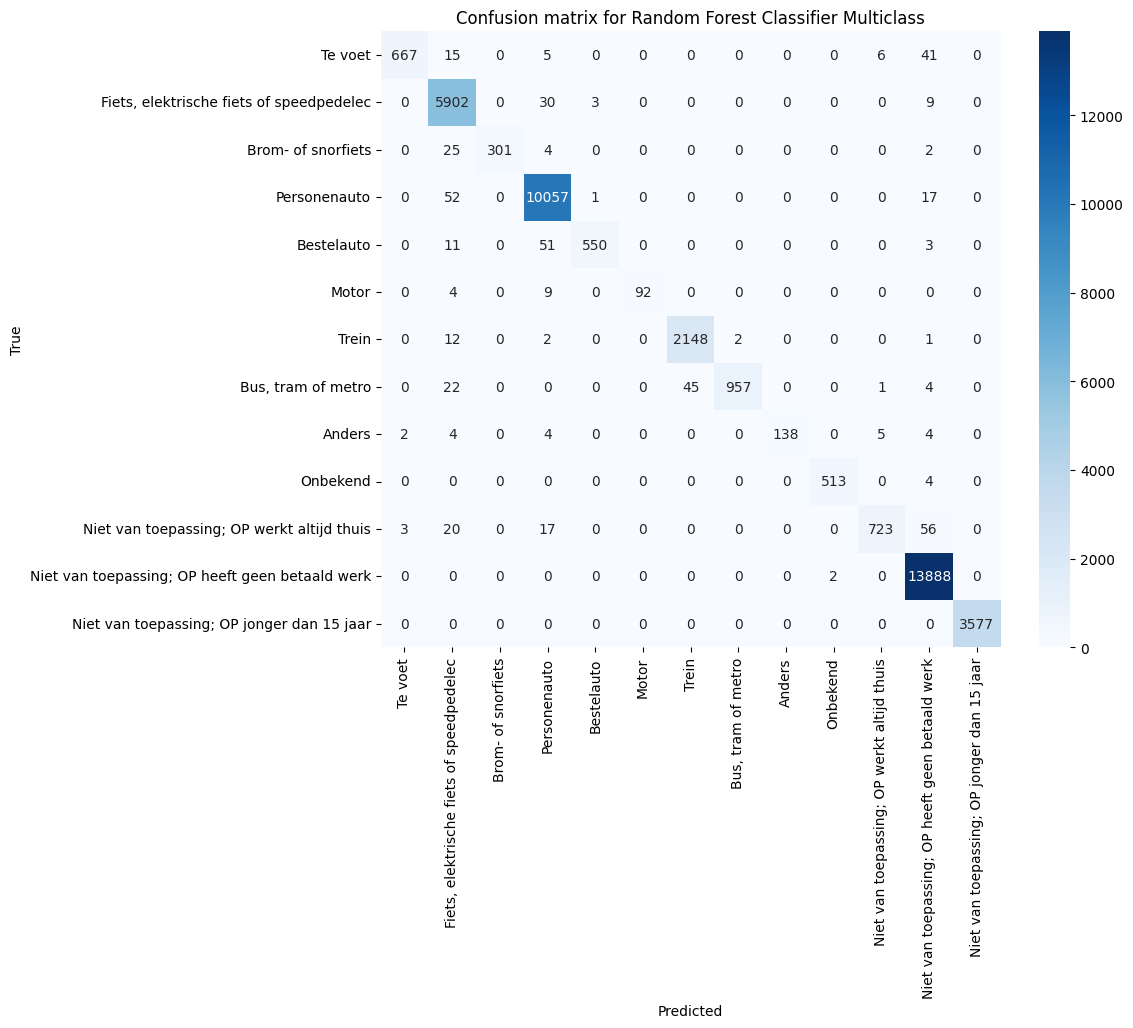

In [ ]:
plot_confusion_matrix(
    cm=cm,
    labels=labels,
    title="Confusion matrix for Random Forest Classifier Multiclass",
    show=True
)